## import libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

## EDA

In [76]:
df = pd.read_csv("survey.csv")

In [77]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [79]:
df['Timestamp'].value_counts().sum()

1259

In [80]:
df['Timestamp'].dtype

dtype('O')

In [81]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:00,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:00,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:00,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:00,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:00,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:00,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:00,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:00,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:00,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [82]:
df['Timestamp'].dtype

dtype('<M8[ns]')

## Feature Engineering

In [83]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [84]:
df['Gender'].describe()

count     1259
unique      49
top       Male
freq       615
Name: Gender, dtype: object

In [85]:
temp=pd.DataFrame()
temp['Gender']=df['Gender']

In [86]:
df =df.drop(["Gender"],axis=1)

In [87]:
genders= temp['Gender'].unique()
genders

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [88]:
temp[temp['Gender']=='Male-ish'] = "male"          
temp[temp['Gender']=='maile'] = "male"
temp[temp['Gender']=='something kinda male'] = "male"
temp[temp['Gender']=='Cis Male'] = "male"
temp[temp['Gender']=='Male (CIS)'] = "male"
temp[temp['Gender']=='Nah'] = "male"
temp[temp['Gender']=='Guy (-ish) ^_^'] = "male"
temp[temp['Gender']=='Male '] = "male"
temp[temp['Gender']=='Man'] = "male"
temp[temp['Gender']=='msle'] = "male"
temp[temp['Gender']=='Mail'] = "male"
temp[temp['Gender']=='cis male'] = "male"
temp[temp['Gender']=='Malr'] = "male"
temp[temp['Gender']=='Cis Man'] = "male"
temp[temp['Gender']=='ostensibly male'] = "male"
temp[temp['Gender']=='Malr'] = "male"
temp[temp['Gender']=='M'] = "male"
temp[temp['Gender']=='Male'] = "male"
temp[temp['Gender']=='m'] = "male"
temp[temp['Gender']=='something kinda male?'] = "male"
temp[temp['Gender']=='Make'] = "male"
temp[temp['Gender']=='something kinda male?'] = "male"
temp[temp['Gender']=='Mal'] = "male"
temp[temp['Gender']=='A little about you'] = "male"
temp[temp['Gender']=='p'] = "male"
temp[temp['Gender']=='ostensibly male, unsure what that really means'] = "male"

In [89]:
genders= temp['Gender'].unique()
genders

array(['Female', 'male', 'female', 'Trans-female', 'Cis Female', 'F',
       'Woman', 'f', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'All', 'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne',
       'Agender', 'cis-female/femme', 'male leaning androgynous',
       'Trans woman', 'Neuter', 'Female (trans)', 'queer', 'Female (cis)',
       'femail'], dtype=object)

In [90]:
temp[temp['Gender']=='Female'] = "female"          
temp[temp['Gender']=='Cis Female'] = "female"
temp[temp['Gender']=='F'] = "female"
temp[temp['Gender']=='f'] = "female"
temp[temp['Gender']=='Femake'] = "female"
temp[temp['Gender']=='woman'] = "female"
temp[temp['Gender']=='Woman'] = "female"
temp[temp['Gender']=='Female '] = "female"
temp[temp['Gender']=='cis-female/femme'] = "female"
temp[temp['Gender']=='Female (cis)'] = "female"
temp[temp['Gender']=='femail'] = "female"

In [91]:
genders= temp['Gender'].unique()
genders

array(['female', 'male', 'Trans-female', 'queer/she/they', 'non-binary',
       'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender',
       'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer'], dtype=object)

In [92]:
temp[temp['Gender']=='queer/she/they'] = "queer"
temp[temp['Gender']=='non-binary'] = "enby"
temp[temp['Gender']=='Enby'] = "enby"
temp[temp['Gender']=='Genderqueer'] = "queer"
temp[temp['Gender']=='male leaning androgynous'] = "androgynous"
temp[temp['Gender']=='Androgyne'] = "androgynous"
temp[temp['Gender']=='Female (trans)'] = "trans"
temp[temp['Gender']=='p'] = "male"

In [93]:
genders= temp['Gender'].unique()
genders

array(['female', 'male', 'Trans-female', 'queer', 'enby', 'All', 'fluid',
       'androgynous', 'Agender', 'Trans woman', 'Neuter', 'trans'],
      dtype=object)

In [94]:
temp['Gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1254      male
1255      male
1256      male
1257    female
1258      male
Name: Gender, Length: 1259, dtype: object

In [95]:
df = pd.concat([df,temp ], axis=1)

In [96]:
df.head()

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender
0,2014-08-27 11:29:00,37,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,female
1,2014-08-27 11:29:00,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,male
2,2014-08-27 11:29:00,32,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,male
3,2014-08-27 11:29:00,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,male
4,2014-08-27 11:30:00,31,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,male


## EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Gender', ylabel='count'>

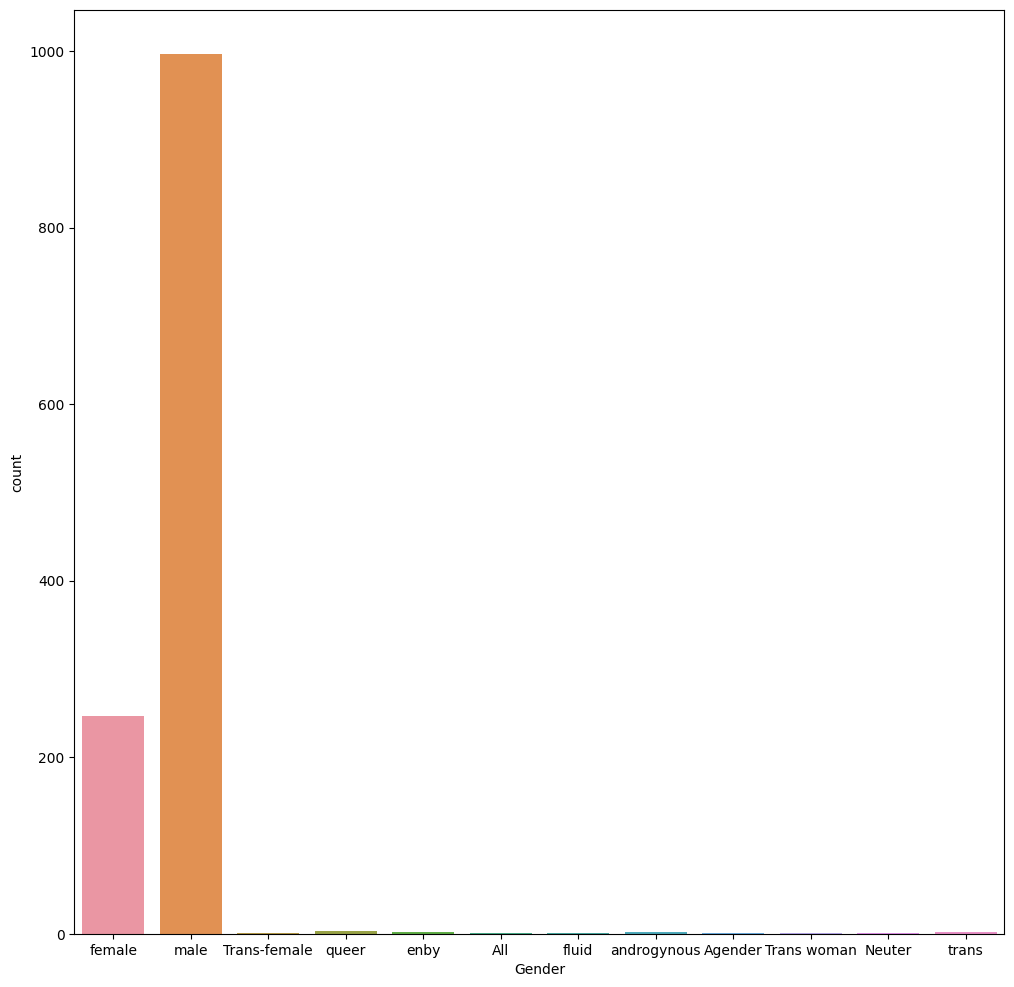

In [97]:
plt.figure(figsize=(12,12)) 
sns.countplot('Gender',data=df)

In [98]:
df.head()

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender
0,2014-08-27 11:29:00,37,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,female
1,2014-08-27 11:29:00,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,male
2,2014-08-27 11:29:00,32,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,male
3,2014-08-27 11:29:00,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,male
4,2014-08-27 11:30:00,31,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,male


In [99]:
df['Gender'].unique()

array(['female', 'male', 'Trans-female', 'queer', 'enby', 'All', 'fluid',
       'androgynous', 'Agender', 'Trans woman', 'Neuter', 'trans'],
      dtype=object)

In [100]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age', ylabel='count'>

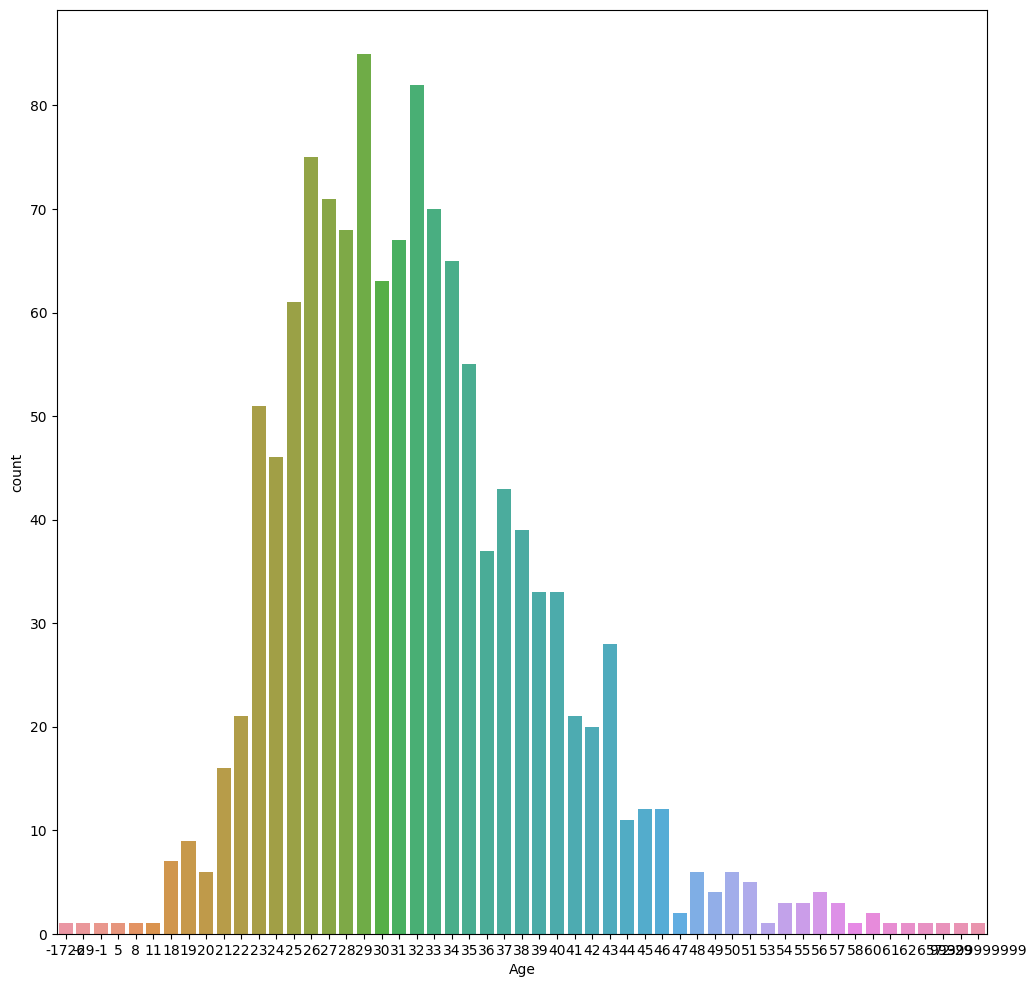

In [101]:
plt.figure(figsize=(12,12)) 
sns.countplot(df['Age'])

In [102]:
temp=pd.DataFrame()
temp['Age']=df['Age']
df=df.drop(['Age'],axis=1)

In [103]:
temp['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [104]:
temp.loc[temp['Age'] <= 1] = int(temp['Age'].mode())

In [105]:
temp.loc[temp['Age'] >= 100] = int(temp['Age'].mode())

In [106]:
df = pd.concat([df,temp ], axis=1)

In [107]:
df.head()

,Timestamp,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender,Age
0,2014-08-27 11:29:00,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,female,37
1,2014-08-27 11:29:00,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,male,44
2,2014-08-27 11:29:00,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,male,32
3,2014-08-27 11:29:00,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,male,31
4,2014-08-27 11:30:00,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,male,31


## Feature Engineering

In [108]:
temp['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [109]:
df.isnull().sum()

Timestamp                       0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
Gender                          0
Age                             0
dtype: int64

In [110]:
df.loc[(df["state"].isnull()),['state']]

,state
2,NaN
3,NaN
7,NaN
9,NaN
11,NaN
...,...
1244,NaN
1245,NaN
1247,NaN
1251,NaN


In [111]:
df = df.drop(['state','comments'],axis=1)
df.head()

,Timestamp,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender,Age
0,2014-08-27 11:29:00,United States,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,female,37
1,2014-08-27 11:29:00,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,male,44
2,2014-08-27 11:29:00,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,male,32
3,2014-08-27 11:29:00,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,male,31
4,2014-08-27 11:30:00,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,male,31


In [112]:
df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [113]:
df["work_interfere"].mode()

0    Sometimes
Name: work_interfere, dtype: object

In [114]:
df.loc[(df["work_interfere"].isnull()),["work_interfere"]] = "Sometimes"

In [115]:
df.head()

,Timestamp,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender,Age
0,2014-08-27 11:29:00,United States,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,female,37
1,2014-08-27 11:29:00,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,male,44
2,2014-08-27 11:29:00,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,male,32
3,2014-08-27 11:29:00,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,male,31
4,2014-08-27 11:30:00,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,male,31


In [116]:
print(df["self_employed"].mode())
df.loc[(df["self_employed"].isnull()),["self_employed"]] = "No"

0    No
Name: self_employed, dtype: object


In [117]:
df.isnull().sum()

Timestamp                    0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Gender                       0
Age                          0
dtype: int64

In [118]:
df.head()

,Timestamp,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender,Age
0,2014-08-27 11:29:00,United States,No,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,female,37
1,2014-08-27 11:29:00,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,male,44
2,2014-08-27 11:29:00,Canada,No,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,male,32
3,2014-08-27 11:29:00,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,male,31
4,2014-08-27 11:30:00,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,male,31


In [119]:
df.no_employees.unique()

array(['25-Jun', 'More than 1000', '26-100', '100-500', '5-Jan',
       '500-1000'], dtype=object)

In [120]:
df.no_employees.value_counts()

25-Jun            290
26-100            289
More than 1000    282
100-500           176
5-Jan             162
500-1000           60
Name: no_employees, dtype: int64

In [121]:
df.loc[(df['no_employees'] == "25-Jun"),['no_employees']] = "6-25"

In [122]:
df.loc[(df['no_employees'] == "5-Jan"),['no_employees']] = "1-5"

In [123]:
df['no_employees'].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

In [124]:
col = df.columns
for i in col:
    if i == "Timestamp" or i == "Country" or i == "Age" :
        continue
    print("\n\n{} : ".format(i))
    print(df[i].value_counts())



self_employed : 
No     1113
Yes     146
Name: self_employed, dtype: int64


family_history : 
No     767
Yes    492
Name: family_history, dtype: int64


treatment : 
Yes    637
No     622
Name: treatment, dtype: int64


work_interfere : 
Sometimes    729
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


no_employees : 
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64


remote_work : 
No     883
Yes    376
Name: remote_work, dtype: int64


tech_company : 
Yes    1031
No      228
Name: tech_company, dtype: int64


benefits : 
Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64


care_options : 
No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


wellness_program : 
No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64


seek_help : 
No 

### EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age'>

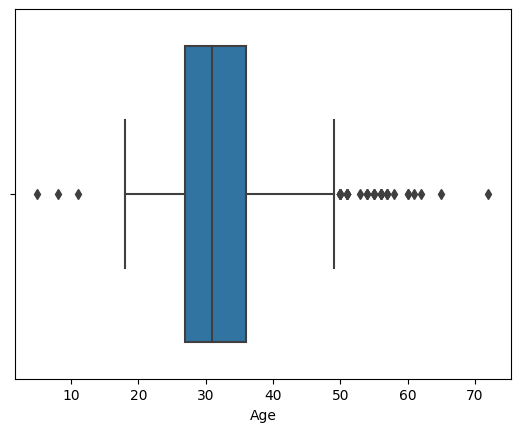

In [125]:
sns.boxplot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age', ylabel='Density'>

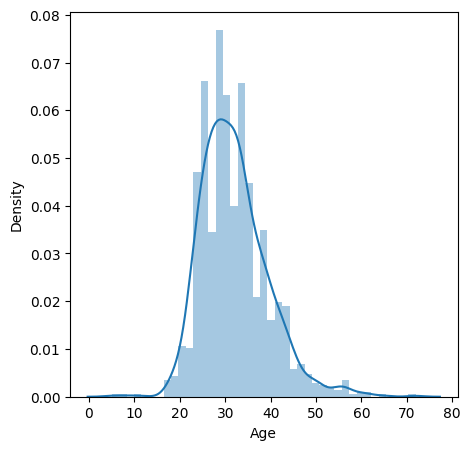

In [144]:
plt.figure(figsize=(5,5))
sns.distplot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age', ylabel='count'>

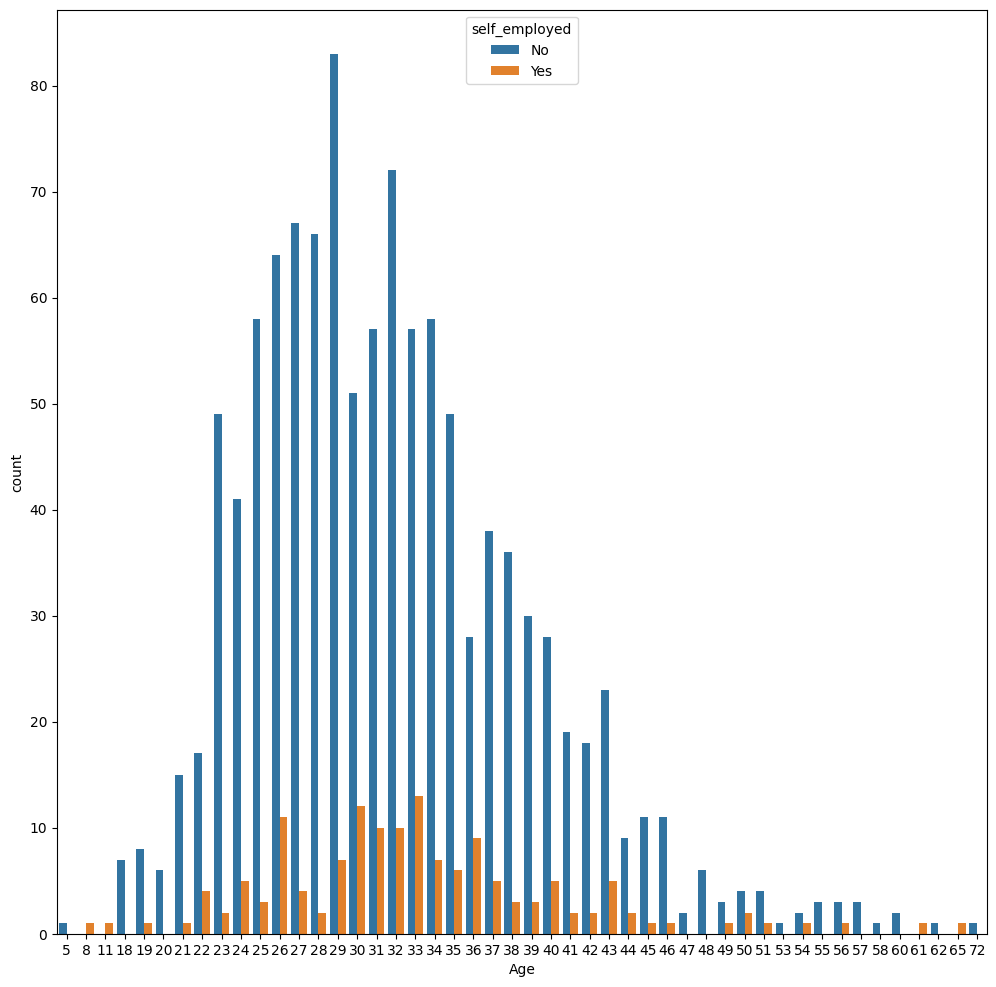

In [126]:
plt.figure(figsize=(12,12))
sns.countplot(df['Age'],hue=df['self_employed'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='self_employed', ylabel='count'>

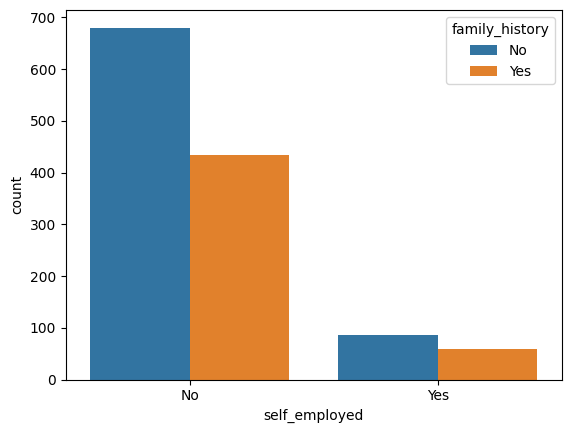

In [127]:
sns.countplot(df["self_employed"],hue=df['family_history'])

In [128]:
df['work_interfere'].value_counts()

Sometimes    729
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

([<matplotlib.patches.Wedge at 0x2c3600917c0>,
 [Text(-0.27031416140598746, 1.0662693159532342, 'Sometimes'),
  Text(-0.5681226198237496, -0.941932422652814, 'Never'),
  Text(0.44899788661743795, -1.0041916638834811, 'Rarely'),
  Text(1.0297481048322066, -0.38680594694818105, 'Often')])

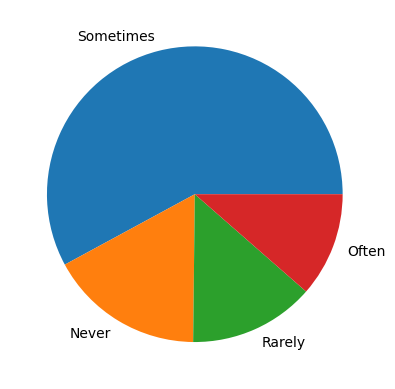

In [129]:
options = ["Sometimes","Never","Rarely","Often"]
sizes = [729 , 213 , 173 , 144]
plt.pie(sizes,labels = options)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='work_interfere', ylabel='count'>

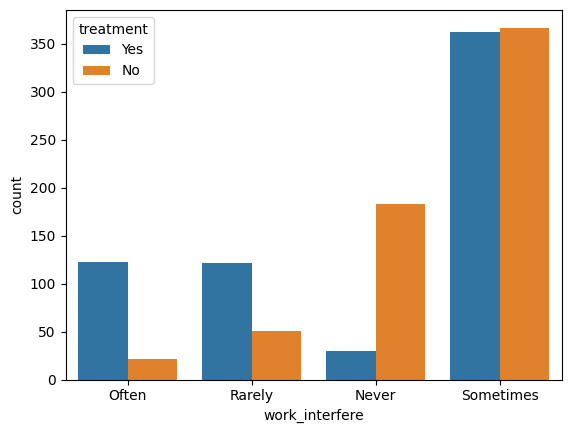

In [130]:
sns.countplot(df['work_interfere'],hue=df['treatment'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='treatment', ylabel='count'>

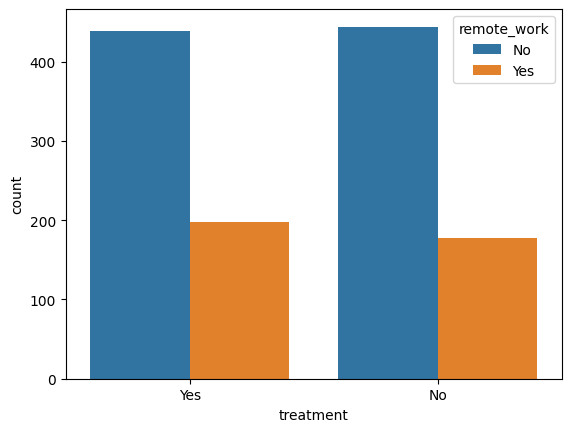

In [131]:
sns.countplot(df['treatment'],hue=df['remote_work'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='treatment', ylabel='count'>

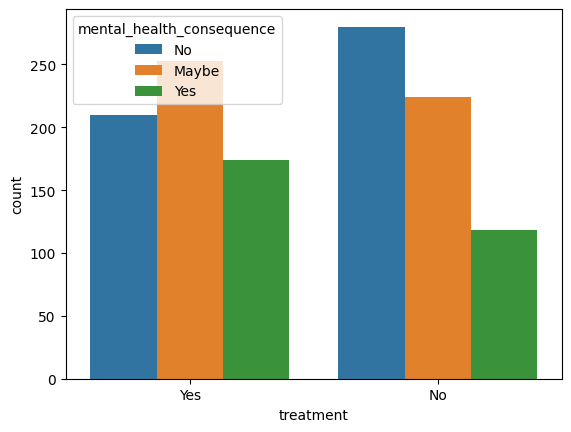

In [132]:
sns.countplot(df['treatment'],hue=df['mental_health_consequence'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='treatment', ylabel='count'>

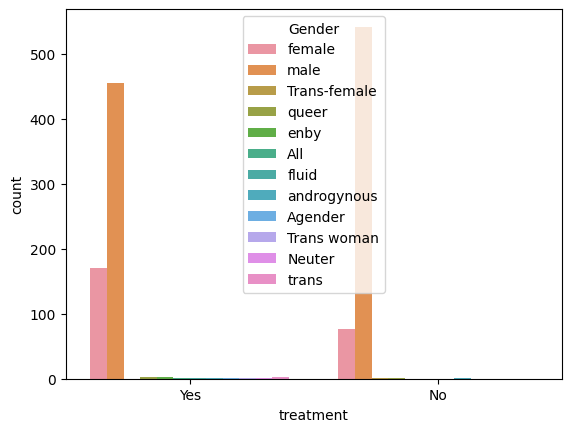

In [133]:
sns.countplot(df['treatment'],hue=df['Gender'])

<AxesSubplot: >

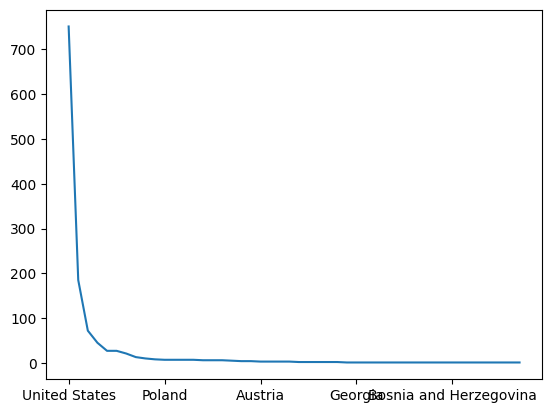

In [135]:
df['Country'].value_counts().plot()

<AxesSubplot: >

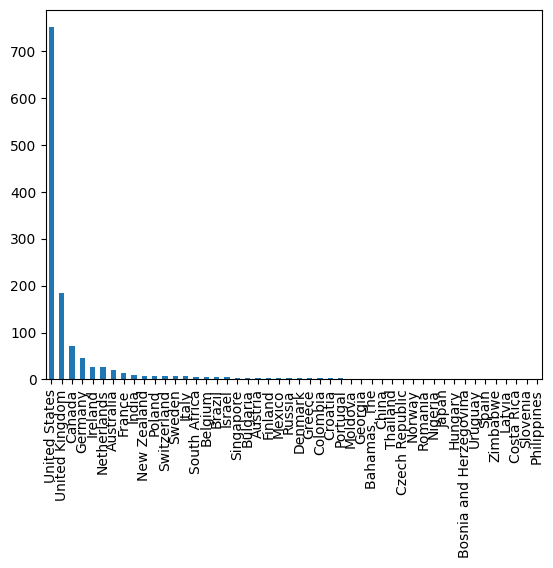

In [136]:
df['Country'].value_counts().plot(kind='bar')

In [60]:
df.head()

,Timestamp,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender,Age
0,2014-08-27 11:29:00,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,female,37
1,2014-08-27 11:29:00,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,male,44
2,2014-08-27 11:29:00,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,male,32
3,2014-08-27 11:29:00,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,male,31
4,2014-08-27 11:30:00,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,male,31


In [61]:
df= df.drop(['Timestamp'],axis=1)

In [62]:
df = df.drop(['Country'],axis=1)

In [63]:
df.head()

,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender,Age
0,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,female,37
1,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,male,44
2,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,male,32
3,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,male,31
4,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,male,31


In [64]:
x = df.drop(['treatment'],axis=1)
y = df['treatment']

In [65]:
df.groupby(['treatment','tech_company'])['treatment'].count()

treatment  tech_company
No         No              105
           Yes             517
Yes        No              123
           Yes             514
Name: treatment, dtype: int64

In [66]:
pd.crosstab(df['family_history'],df['treatment'])

treatment,No,Yes
family_history,,
No,495,272
Yes,127,365


In [67]:
pd.crosstab([df.self_employed,df.family_history],df.treatment)

treatment                      No  Yes
self_employed family_history          
No            No              442  238
              Yes             112  321
Yes           No               53   34
              Yes              15   44

In [68]:
x.to_csv('X_train.csv',index=False)
y.to_csv('y_train.csv',index=False)

In [69]:
df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

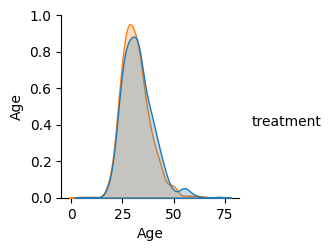

In [70]:
sns.pairplot(df, hue="treatment")